In [1]:
from math import ceil # arredondar

import pandas_datareader as dr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [2]:
START_DATE = "2015-01-01"
END_DATE = "2021-11-20"
STOCK = "ATVI" # Activision Blizzard
TRAINING_SPLIT_PERCENTAGE = .8 # Percentage of the data that will be trained
EPOCH = 30

In [3]:
# Getting the historical stock values
# from http://finance.yahoo.com/

stock_data = dr.DataReader(STOCK, start=START_DATE, end=END_DATE, data_source="yahoo")

# Data Visualization
Visualing the raw data

In [4]:
stock_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,20.280001,19.990000,20.240000,20.129999,3233400.0,19.168921
2015-01-05,20.180000,19.780001,20.139999,19.850000,5008400.0,18.902290
2015-01-06,19.969999,19.360001,19.879999,19.480000,6387500.0,18.549952
2015-01-07,19.740000,18.860001,19.590000,19.059999,16560300.0,18.150005
2015-01-08,19.490000,19.139999,19.250000,19.250000,17656100.0,18.330935
...,...,...,...,...,...,...
2021-11-15,70.680000,68.139999,69.320000,70.430000,11628200.0,70.430000
2021-11-16,72.139999,65.459999,70.550003,66.139999,38243200.0,66.139999
2021-11-17,65.639999,63.500000,65.529999,64.199997,28771200.0,64.199997


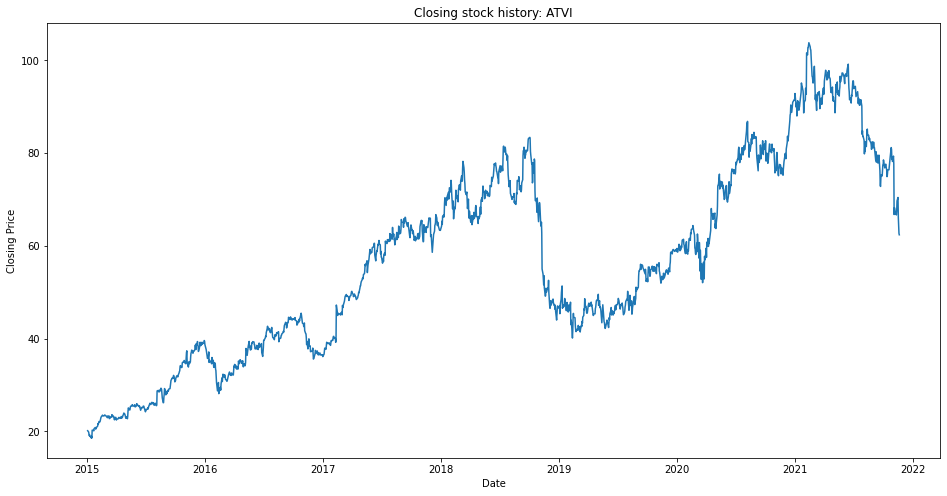

In [5]:
plt.figure(figsize=(16, 8))
plt.title(f"Closing stock history: {STOCK}")
plt.plot(stock_data['Close'])
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Data Preparation

First we're getting an array of values of 'close' column

In [6]:

close_stock_price_df = stock_data.filter(['Close'])
close_stock_price = close_stock_price_df.values

After that we're normalizing the data, passing the array through a scaler

In [7]:

scaler = MinMaxScaler(feature_range=(0, 1))
normalized_stock_price = scaler.fit_transform(close_stock_price)

Splitting the data between training data and test_data

In [8]:
training_days = ceil(
    len(normalized_stock_price) * TRAINING_SPLIT_PERCENTAGE
) # getting the days that will be trained

train_stock_price = normalized_stock_price[:training_days]

x_train = []
y_train = []

# Creating a "batch" of 30 days each
# where each new batch is adding on
# E.g. for a batch of 3: first batch: 1, 2, 3, second: 2, 3, 4
for i in range(30, len(train_stock_price)):
    x_train.append(train_stock_price[i-30:i])
    y_train.append(train_stock_price[i])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (len(x_train), 30, 1))

test_stock_price = normalized_stock_price[training_days - 30:]

x_test = []
y_test = stock_data[training_days:]

for i in range(30, len(test_stock_price)):
    x_test.append(test_stock_price[i-30:i])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (len(x_test), 30, 1))

# Creating the model

In [9]:
model = Sequential()

# How the LSTM works
# What is "return sequence"?
model.add(
    LSTM(units=50, return_sequences=True, input_shape=(30, 1))
)
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

2021-11-25 22:34:36.724978: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-25 22:34:36.731215: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-25 22:34:36.731681: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-25 22:34:36.732624: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [10]:
model.fit(x_train, y_train, batch_size=1, epochs=EPOCH)

Epoch 1/30


2021-11-25 22:34:39.818539: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101


1358/1358 [==============================] - 8s 4ms/step - loss: 0.0016
Epoch 2/30
1358/1358 [==============================] - 5s 4ms/step - loss: 7.4494e-04
Epoch 3/30
1358/1358 [==============================] - 5s 4ms/step - loss: 5.2338e-04
Epoch 4/30
1358/1358 [==============================] - 5s 4ms/step - loss: 4.0897e-04
Epoch 5/30
1358/1358 [==============================] - 6s 4ms/step - loss: 3.9245e-04
Epoch 6/30
1358/1358 [==============================] - 5s 4ms/step - loss: 4.0343e-04
Epoch 7/30
1358/1358 [==============================] - 5s 4ms/step - loss: 3.3446e-04
Epoch 8/30
1358/1358 [==============================] - 5s 4ms/step - loss: 3.5630e-04
Epoch 9/30
1358/1358 [==============================] - 5s 3ms/step - loss: 3.4349e-04
Epoch 10/30
1358/1358 [==============================] - 5s 3ms/step - loss: 3.7050e-04
Epoch 11/30
1358/1358 [==============================] - 5s 4ms/step - loss: 3.5976e-04
Epoch 12/30
1358/1358 [==============================] -

# Prediction

In [11]:
predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)

In [12]:
# calculating the mse of the test data
mse = np.sqrt(np.mean(((predictions - y_test)**2)))
mse

High         2.456422e+00
Low          1.624187e+00
Open         1.656691e+00
Close        1.959815e+00
Volume       8.249690e+06
Adj Close    1.851727e+00
dtype: float64

/tmp/ipykernel_20756/2160671257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predictions"] = predictions


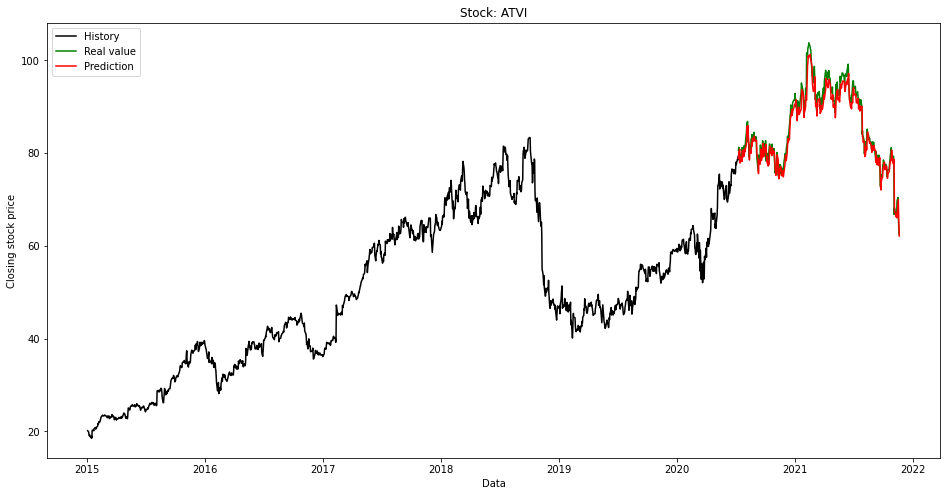

In [13]:
train = close_stock_price_df[:training_days]
test = close_stock_price_df[training_days:]
test["Predictions"] = predictions

plt.figure(figsize=(16, 8))
plt.title(f"Stock: {STOCK}")
plt.xlabel("Data")
plt.ylabel("Closing stock price")
plt.plot(train["Close"], color="black")
plt.plot(test["Close"], color="green")
plt.plot(test["Predictions"], color="red")
plt.legend(["History", "Real value", "Prediction"])
plt.show()

In [15]:
stock_data = dr.DataReader(STOCK, start="2021-08-23",end="2021-10-05", data_source='yahoo')

x = stock_data.filter(['Close'])
x = scaler.fit_transform(x)
x = np.array(x)[:-1] # remover o dia 05/10
x = np.reshape(x, (1,30,1))

prediction = model.predict(x) 

prediction = scaler.inverse_transform(prediction)
real = stock_data.filter(['Close']).values[-1]

print('predição: ',prediction)
print('real: ',real)

predição:  [[77.22165]]
real:  [76.80000305]
